In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

NOTAS MIKE: un tensor en estos mundos de machine learning nada mas que un vector, pero un vector que tienes las columnas de las mismas dimensiones, un 4x3 seria un tensor, pero una cosa asi ya no [[1],[1,2]]. Y luego el rank (o axis) es la dimendiones que tiene el vector, por ejemplo una image con color seria un tensor de rank 3 (dos dimiensiones representan las posiciones y oscuro que esta el pixel y luego el color es la otra).

In [3]:
# crea un tensor de n filas y 2 columnas de todo unos
x = torch.ones(n,2) 
# : means every row, and 0 is column 0, y el _ en las funciones en pytorch es don't return this code to me but replace
#(como un extend bueno)
x[:,0].uniform_(-1.,1)
x[:5]


tensor([[ 0.3683,  1.0000],
        [-0.3496,  1.0000],
        [ 0.0689,  1.0000],
        [ 0.5243,  1.0000],
        [ 0.2886,  1.0000]])

NOTAS MIKE: aqui sabemos que los coeficientes a1 y a2 son 3 y 2 (lo del punto es para hacerlos float como en python bueno) entonces lo que esta haciendo es creando la recta y luego dando los valores random para sacar unos puntos random y luego poder hacer como si no supiera que los coeficientes eran 3 y 2 y encontrarlos con el Gradient Descent

In [7]:


a = tensor(3.,2); a

tensor([3., 2.])

In [5]:
??tensor

In [24]:
doc(tensor)

In [13]:
# y = ax + b || y = ax1 + bx2 & x2=1 
y = x@a + torch.rand(n)
# y = x@a <--- si fuera esto seria una recta con espacios un poco entre los puntos por la uniform de arriba

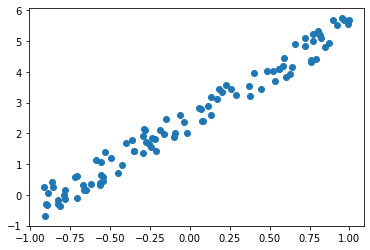

In [14]:
plt.scatter(x[:,0], y);

NOTAS MIKE: y_hat es la funcion hypothesis, basicamente la que estamos aproximando

In [15]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [39]:
a = tensor(-1.,1)

In [40]:
y_hat = x@a
mse(y_hat, y)

tensor(8.1425)

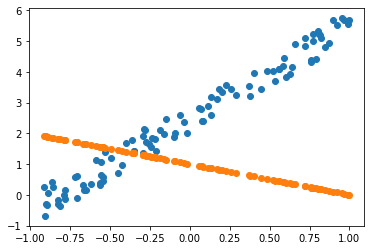

In [41]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [47]:
a = nn.Parameter(a); a

Parameter containing:
tensor([3.0752, 2.4948], requires_grad=True)

NOTAS MIKE:
- backward: te da la derivada que se guarda en el attribute ".grad" del coeficiente (aunque no se porque)
- lr: learning rate

In [48]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
        
    # Backward te calcula la derivada, en este caso para encontrar el valor mínimo de la cost function "loss"
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad) # esto aplica la a = a - lr*derivada_de_loss (y el _ lo hace in place)
        a.grad.zero_()

In [49]:
lr = 1e-1
for t in range(100): update()

tensor(0.0919, grad_fn=<MeanBackward0>)
tensor(0.0919, grad_fn=<MeanBackward0>)
tensor(0.0919, grad_fn=<MeanBackward0>)
tensor(0.0919, grad_fn=<MeanBackward0>)
tensor(0.0919, grad_fn=<MeanBackward0>)
tensor(0.0919, grad_fn=<MeanBackward0>)
tensor(0.0919, grad_fn=<MeanBackward0>)
tensor(0.0919, grad_fn=<MeanBackward0>)
tensor(0.0919, grad_fn=<MeanBackward0>)
tensor(0.0919, grad_fn=<MeanBackward0>)


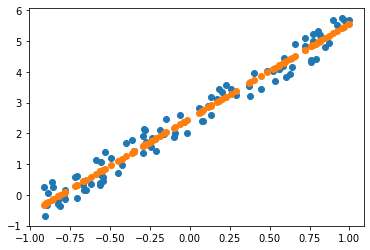

In [51]:
plt.scatter(x[:,0],y)
with torch.no_grad():
    plt.scatter(x[:,0],x@a);

NOTAS MIKE: Este es un caso simple para una linear regression, pero te va buena intuición para modelos más grandes, porque si podemos encontrar que valores hace que la recta se ajuste a los puntos, también podemos fit una función más grande (neural net) que convierte valores de pixel values en probabilidades de que sea un oso determinado o un numbero determinado.
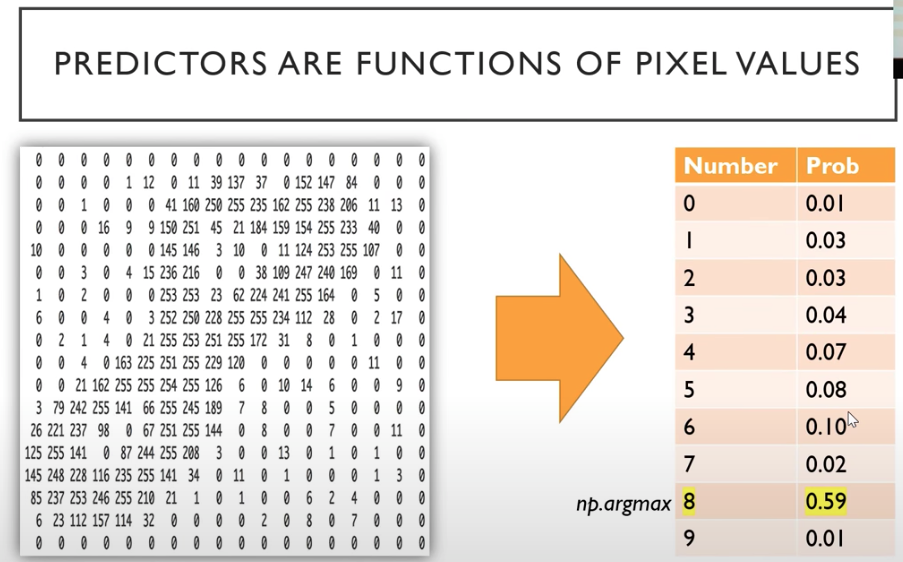



## Animate it!

In [52]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [55]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
with torch.no_grad():
    line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    with torch.no_grad():
        line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

NOTAS MIKE: 
- Epoch: es one complete run through all of our images (si tienes 1000 imagenes y lo divides en batches the 100, son 10 iteraciones pero 1 epoch), normalmente no queremos muchos epochs porque esto lleva a overfitting
- Minibatch: In practice, we don't calculate on the whole file at once, but we use mini-batches, escogemos randomly unos cuantos puntos (si es linear regresion) o imagenes y aplicamos el Gradiend Descent con ellos en vez de con todos (porque usando todos haría que fuera muy lento).
- Architecture/Model: is the mathematical function that fits to our points
- Parameters (aka coeficients/ aka weights): the numbers you are updating para fit la funcion (variables "a" en el caso de la linear regression)

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.


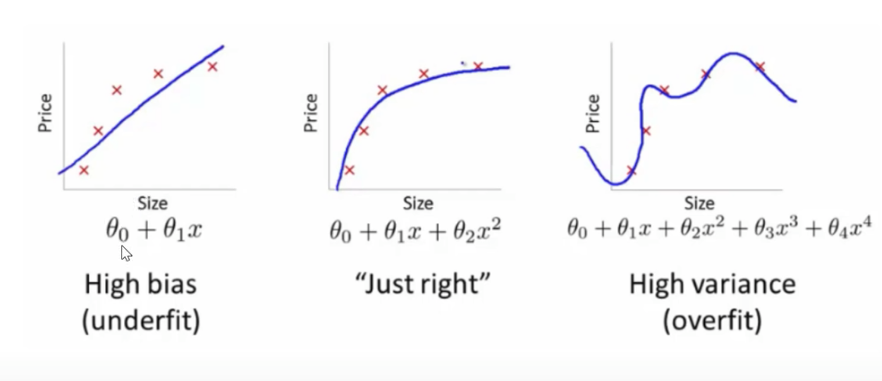